<a href="https://colab.research.google.com/github/daheeem/Automated_MachineLearning/blob/main/Tubes_AutoML_Kel_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TUBES AUTO ML KELOMPOK 19
- ADHITYA MELANI EKA JANARWATI - 1301204046
- MUHAMMAD DAFFA' IBRAHIM - 1301204051

In [ ]:
#instalasi TPOT
%pip install tpot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11938 sha256=24c852262291ab4157c2e851395170fc74c6ecf6b7a311bfec1145a163343aff
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


In [ ]:
#klasifikasi masalah dari TPOT
from tpot import TPOTClassifier
import tpot


In [ ]:
#Libraray mengimport data
from sklearn.model_selection import train_test_split, GridSearchCV
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import metrics


In [ ]:
#Membaca data train
df = pd.read_csv("train.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.1471,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.186,0.2750,0.08902
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.1279,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.243,0.3613,0.08758
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.1052,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198,0.1043,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,9112594,B,13.000,25.13,82.61,520.2,0.08369,0.05073,0.01206,0.01762,...,14.34,31.88,91.06,628.5,0.1218,0.1093,0.04462,0.05921,0.2306,0.06291
459,9112712,B,9.755,28.20,61.68,290.9,0.07984,0.04626,0.01541,0.01043,...,10.67,36.92,68.03,349.9,0.1110,0.1109,0.0719,0.04866,0.2321,0.07211
460,911296201,M,17.080,27.15,111.20,930.9,0.09898,0.11100,0.1007,0.06431,...,22.96,34.49,152.10,1648.0,0.1600,0.2444,0.2639,0.1555,0.3010,0.09060
461,911296202,M,27.420,26.27,186.90,2501.0,0.10840,0.19880,0.3635,0.1689,...,36.04,31.37,251.20,4254.0,0.1357,0.4256,0.6833,0.2625,0.2641,0.07427


In [ ]:
#lima teratas dair data train
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.1471,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.186,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.1279,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.243,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.1052,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.198,0.1043,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4,0.1625,0.2364,0.07678


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       463 non-null    int64  
 1   diagnosis                463 non-null    object 
 2   radius_mean              463 non-null    float64
 3   texture_mean             463 non-null    float64
 4   perimeter_mean           463 non-null    float64
 5   area_mean                463 non-null    float64
 6   smoothness_mean          463 non-null    float64
 7   compactness_mean         463 non-null    float64
 8   concavity_mean           463 non-null    object 
 9   concave points_mean      463 non-null    object 
 10  symmetry_mean            463 non-null    float64
 11  fractal_dimension_mean   463 non-null    float64
 12  radius_se                463 non-null    float64
 13  texture_se               463 non-null    float64
 14  perimeter_se             4

In [ ]:
#check volume data train
df.shape

(463, 32)

In [ ]:
#seleksi fitur
from sklearn.model_selection import train_test_split

In [ ]:
#checking missing value for each feature
print('Checking missing value for each feature:')
print(df.isnull().sum())
#Counting total missing value
print('\nCounting total missing value:')
print(df.isnull().sum().sum())

Checking missing value for each feature:
id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Counting total mi

In [ ]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,...,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,symmetry_worst,fractal_dimension_worst
count,4.630000e+02,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,...,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000
mean,3.072130e+07,236.667337,19.515745,92.786393,666.295032,0.096341,0.104633,0.182116,0.062562,0.415091,...,0.020868,0.003789,16.472354,25.579503,108.584384,903.777538,0.132454,0.256777,0.293355,0.083819
std,1.248655e+08,4224.020741,8.978351,24.392039,356.167006,0.013692,0.053844,0.028023,0.006973,0.287562,...,0.008671,0.002753,4.900876,6.145821,34.002042,583.850860,0.022941,0.161901,0.064266,0.018354
min,8.670000e+03,8.196000,9.710000,43.790000,143.500000,0.062510,0.019380,0.116700,0.049960,0.111500,...,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.156500,0.055040
25%,8.652800e+05,11.800000,16.070000,75.485000,427.950000,0.086580,0.064130,0.162100,0.057585,0.235850,...,0.015170,0.002201,13.060000,20.940000,84.480000,519.300000,0.116600,0.144950,0.252600,0.071250
50%,8.978800e+05,13.480000,18.770000,86.910000,559.200000,0.096100,0.092180,0.180000,0.061300,0.330500,...,0.018840,0.003118,15.030000,25.260000,98.270000,698.700000,0.131400,0.211900,0.284100,0.079930
75%,8.910720e+06,16.150000,21.680000,106.450000,804.100000,0.105350,0.130550,0.196500,0.065815,0.503800,...,0.023765,0.004484,19.515000,29.615000,128.900000,1170.000000,0.146350,0.343700,0.320400,0.092095
max,9.112962e+08,90000.000000,190.000000,188.500000,2501.000000,0.144700,0.345400,0.304000,0.097440,2.873000,...,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,0.663800,0.207500


###**Encoding Dataset**

###Encoding diagnosis as a numerical

###Untuk memudahkan dalam pengolahan data kita mengubah dari diagnosisnya dengan categorical B/M dimapping menjadi 0 atau 1.

In [ ]:
#diagnosis sebagai target variable
df['diagnosis'] = df['diagnosis'].replace({'B':0,'M':1})
print("df_train diagnosis:",df['diagnosis'].unique())


df_train diagnosis: [1 0]


categories of (diagnosis) --- 
 0    275
1    188
Name: diagnosis, dtype: int64
********************************************************************************************************************************************************************************************************


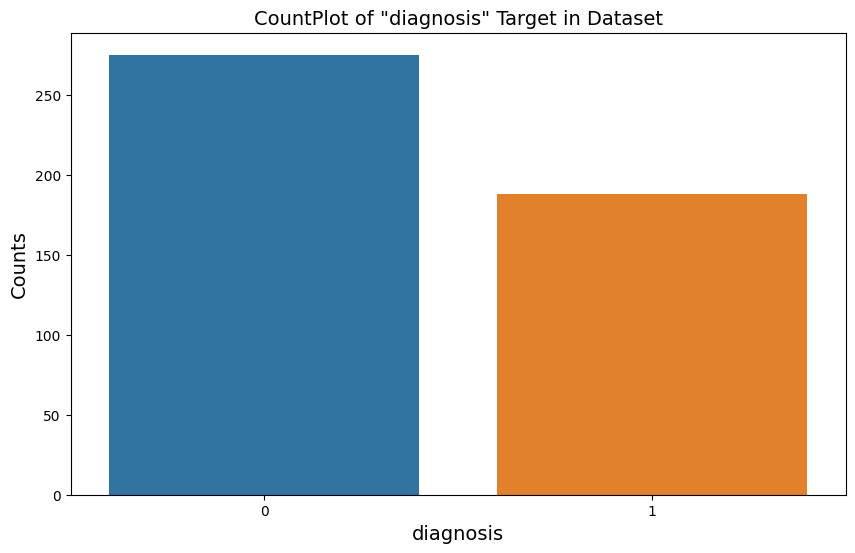

In [ ]:
#Melihat categori
diagnosis_values = df['diagnosis'].value_counts()
print('categories of (diagnosis) --- \n', diagnosis_values)
print('**'*100)

plt.figure(figsize=(10, 6))
sns.countplot(x=df['diagnosis'], data= df, order = diagnosis_values.index)
plt.title('CountPlot of "diagnosis" Target in Dataset', fontsize=14, c = 'k')
plt.xlabel('diagnosis', fontsize = 14, c ='k')
plt.ylabel('Counts', fontsize = 14, c ='k');

### Encoding feature that have categorical data type to numerical

In [ ]:
numerical_features = df.select_dtypes(include=np.number).columns.tolist()
categorical_features = df.select_dtypes(include='object').columns.tolist()

print('Numerical Features:', numerical_features)
print('\nCategorigal Features:', categorical_features)

Numerical Features: ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'symmetry_worst', 'fractal_dimension_worst']

Categorigal Features: ['concavity_mean', 'concave points_mean', 'concavity_se', 'concave points_se', 'concavity_worst', 'concave points_worst']


In [ ]:
for i in categorical_features:
  df[i] = pd.to_numeric(df[i], errors='coerce')
  df[i] = pd.to_numeric(df[i], errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       463 non-null    int64  
 1   diagnosis                463 non-null    int64  
 2   radius_mean              463 non-null    float64
 3   texture_mean             463 non-null    float64
 4   perimeter_mean           463 non-null    float64
 5   area_mean                463 non-null    float64
 6   smoothness_mean          463 non-null    float64
 7   compactness_mean         463 non-null    float64
 8   concavity_mean           456 non-null    float64
 9   concave points_mean      456 non-null    float64
 10  symmetry_mean            463 non-null    float64
 11  fractal_dimension_mean   463 non-null    float64
 12  radius_se                463 non-null    float64
 13  texture_se               463 non-null    float64
 14  perimeter_se             4

#3 MACAM EKSPLORASI DATA


#####1. VIOLIN PLOT berguna untuk mengetahui distribusi dari continous variabel yang ada dan juga menunjukan density dari distribusinya.  ketebalan plot menunjukan density atau kepadatan datanya yang mana semakin besar plotnya menunjukan makin banyak data yang berkumpul pada nilai tersebut. Garis horizontal dalam plot mewakili nilai median data, dan kotak menunjukkan rentang interkuartil (IQR), yang berisi 50% data tengah. Berikut Violin Plot pada dataset.

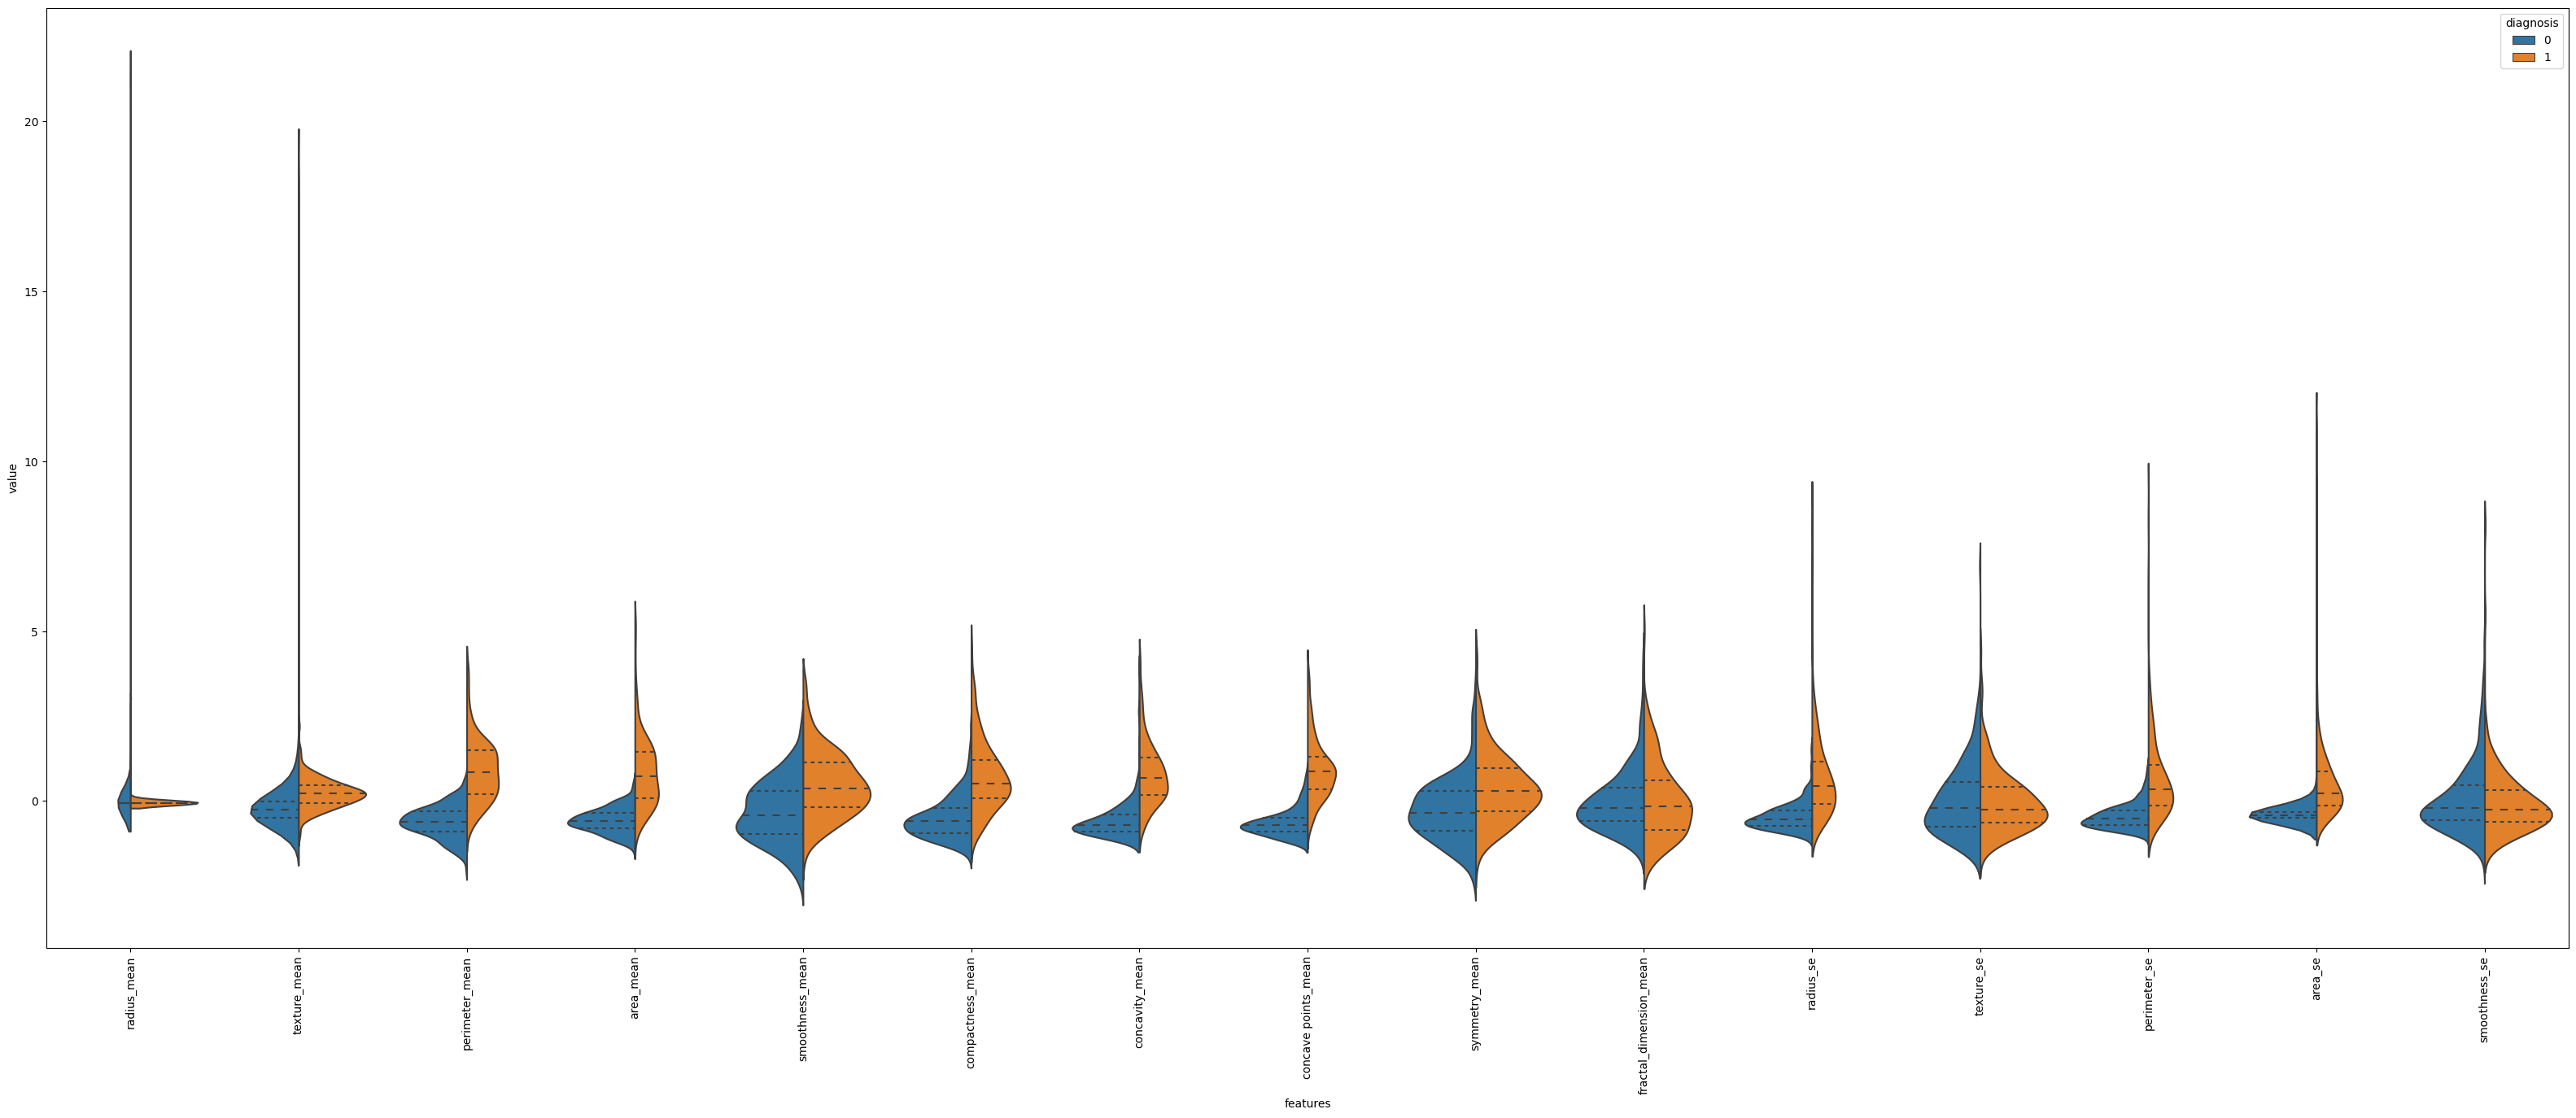

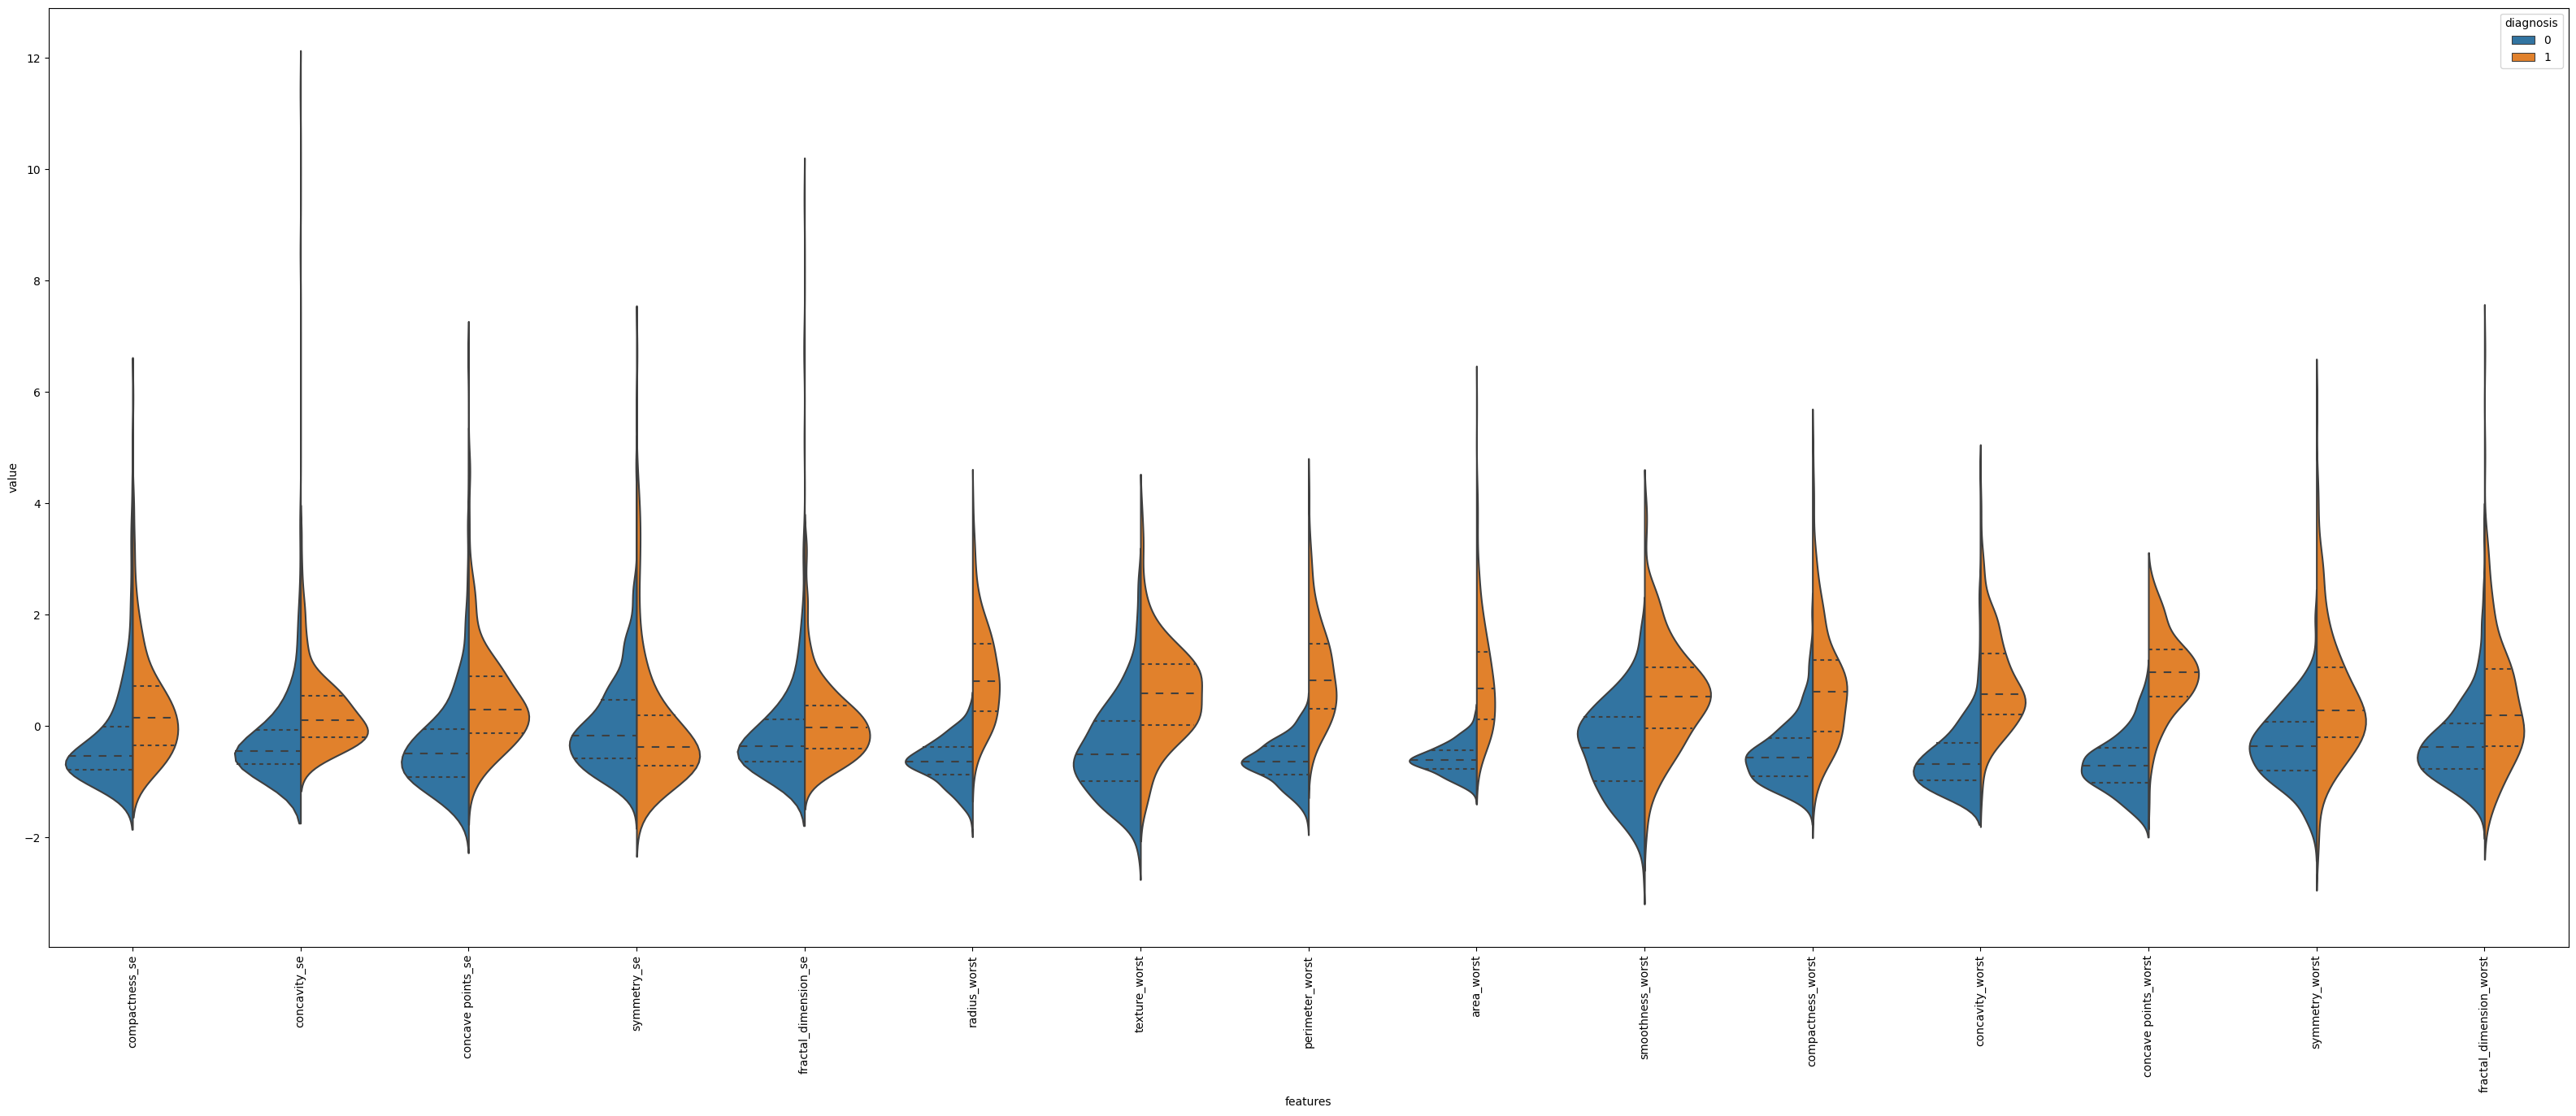

In [ ]:
#VIOLIN PLOT
y_plot = df["diagnosis"]
X_plot = df.drop(["id", "diagnosis"], axis = 1)
stand_data = (X_plot - X_plot.mean()) / (X_plot.std())              # standardization
data = pd.concat([y_plot,stand_data.iloc[:,0:int(X_plot.shape[1]/2)]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(40,15))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90);

stand_data = (X_plot - X_plot.mean()) / (X_plot.std())
data = pd.concat([y_plot,stand_data.iloc[:,int(X_plot.shape[1]/2):]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(40,15))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90);

#####2. Stir Plot merupakan plot sederhana plot sederhana di mana setiap titik data diwakili oleh titik di sepanjang sumbu variabel yang diukur. Dengan warna yang ada, kita bisa membandingkan distribusi variabel yang sama di seluruh grup atau kategori yang berbeda. Terlihat ada beberapa pencilan yang sangat ekstrim diantara beberapa nilai yang sangat kecil, contohnya pada radius mean, texture mean, concavity se, serta fractal dimension se.

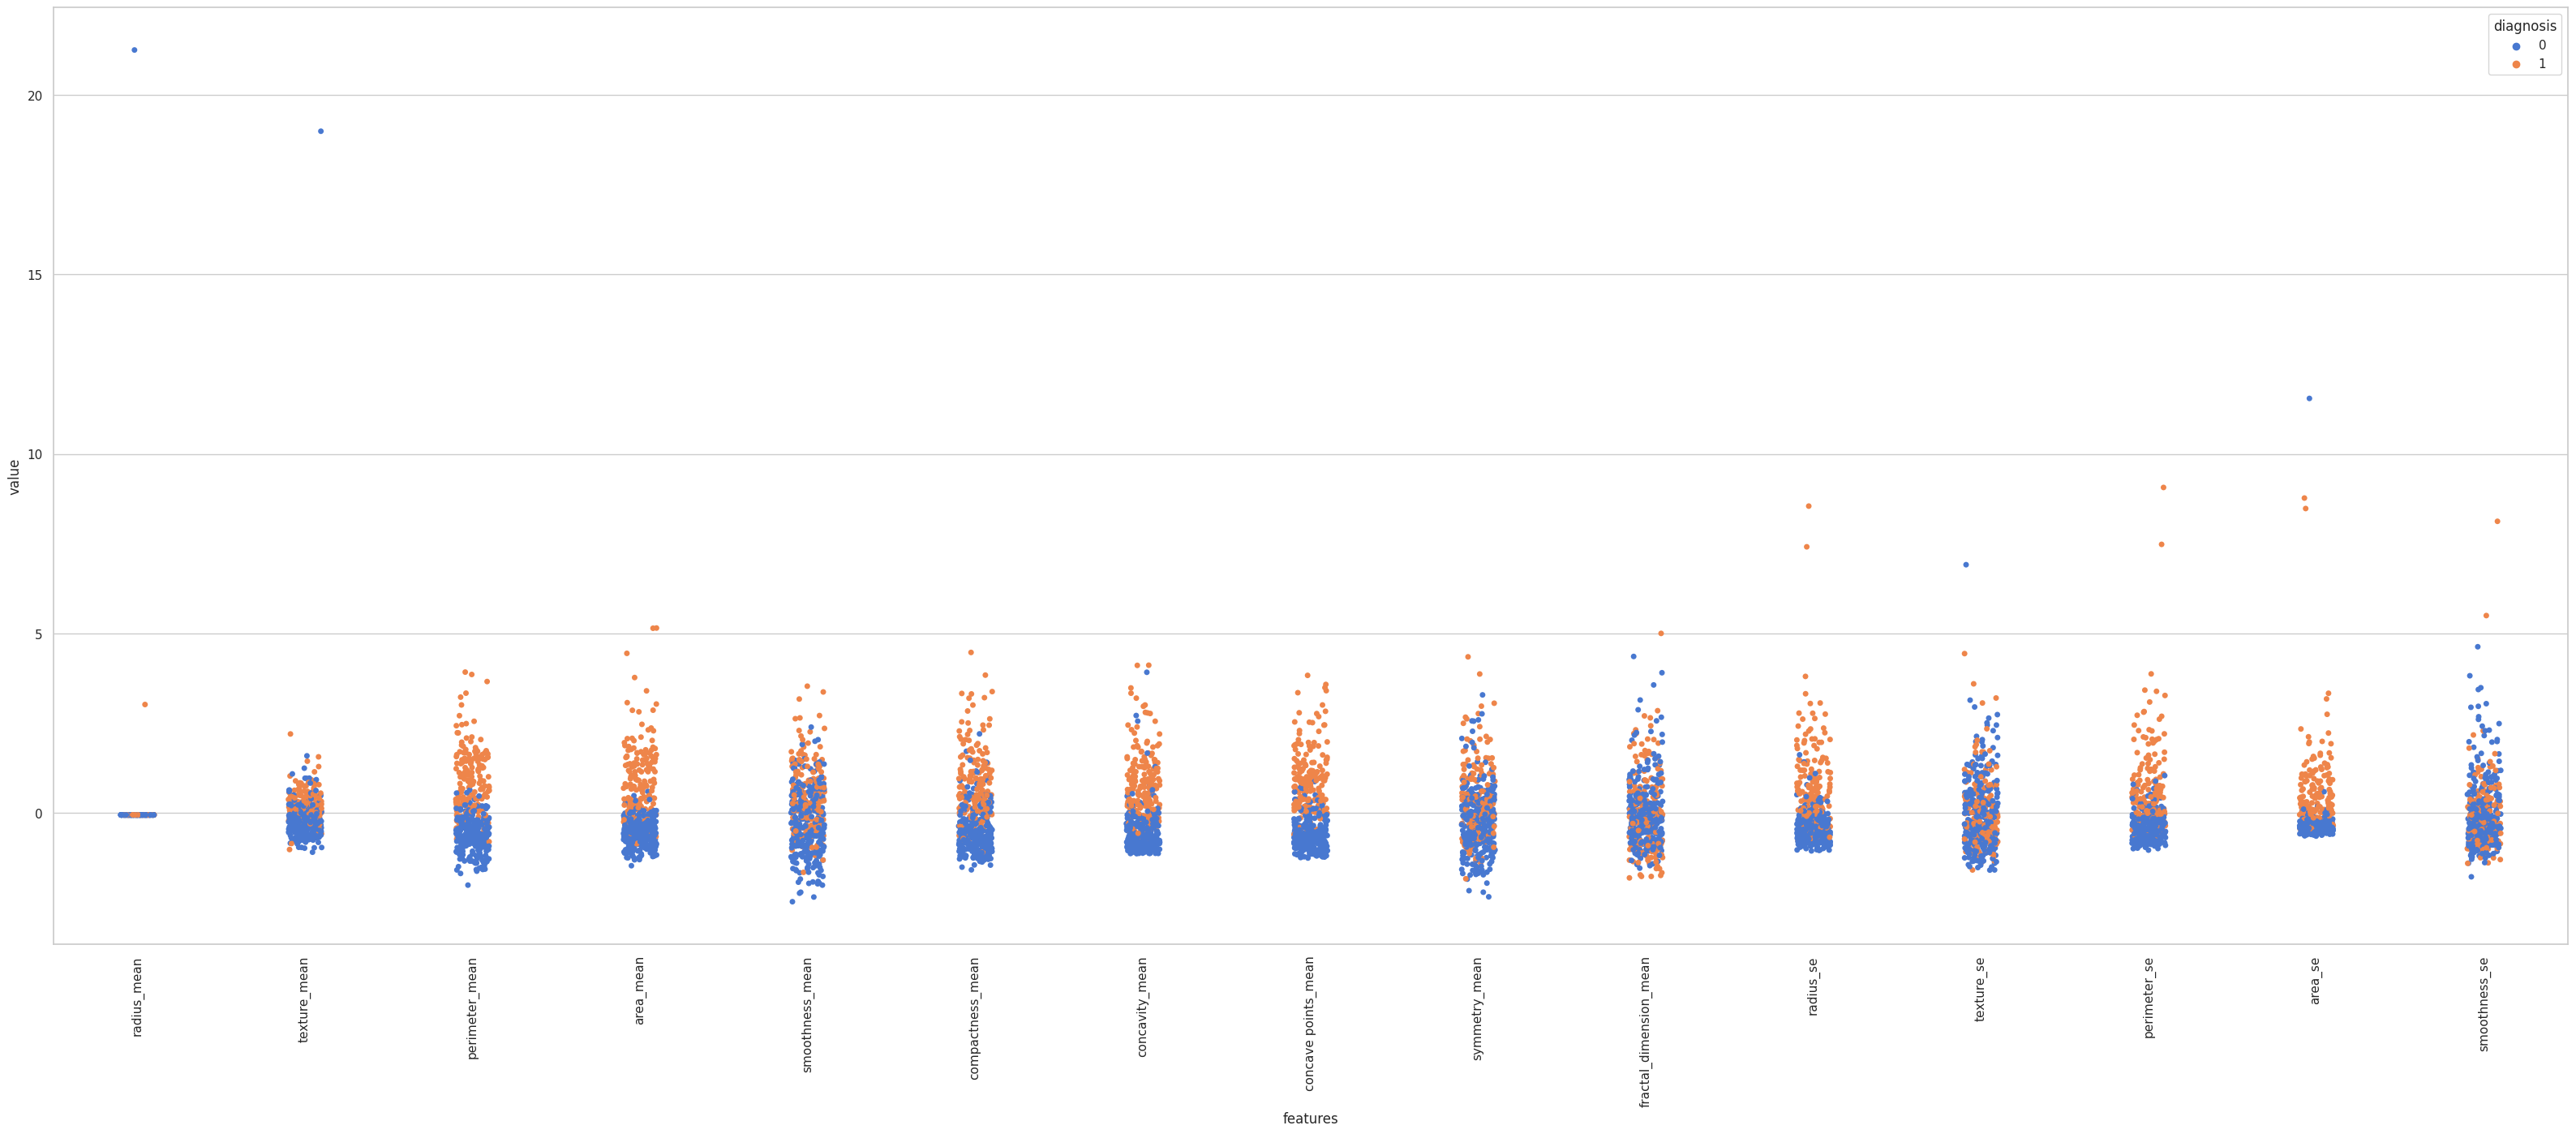

In [ ]:
#Stir Plot
sns.set(style="whitegrid", palette="muted")
data_diagnosis = y_plot
data = X_plot
data_n_2 = (data - data.mean()) / (data.std())
data = pd.concat([y_plot,data_n_2.iloc[:,0:int(X_plot.shape[1]/2)]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(40,15))

sns.stripplot(x="features", y="value", hue="diagnosis", data=data)

plt.xticks(rotation=90);



####3. BOXPLOT yang digunakan untuk visualisasi data yang menampilkan distribusi kontinu. Dalam Box Plot, persegi panjang digambar untuk mewakili rentang interkuartil (IQR), yang berisi 50% data tengah. Garis vertikal digambar di dalam persegi panjang untuk mewakili nilai median data. Whiskers digambar dari atas dan bawah persegi panjang ke pengamatan terbesar dan terkecil yang masih dalam 1,5 kali IQR median.

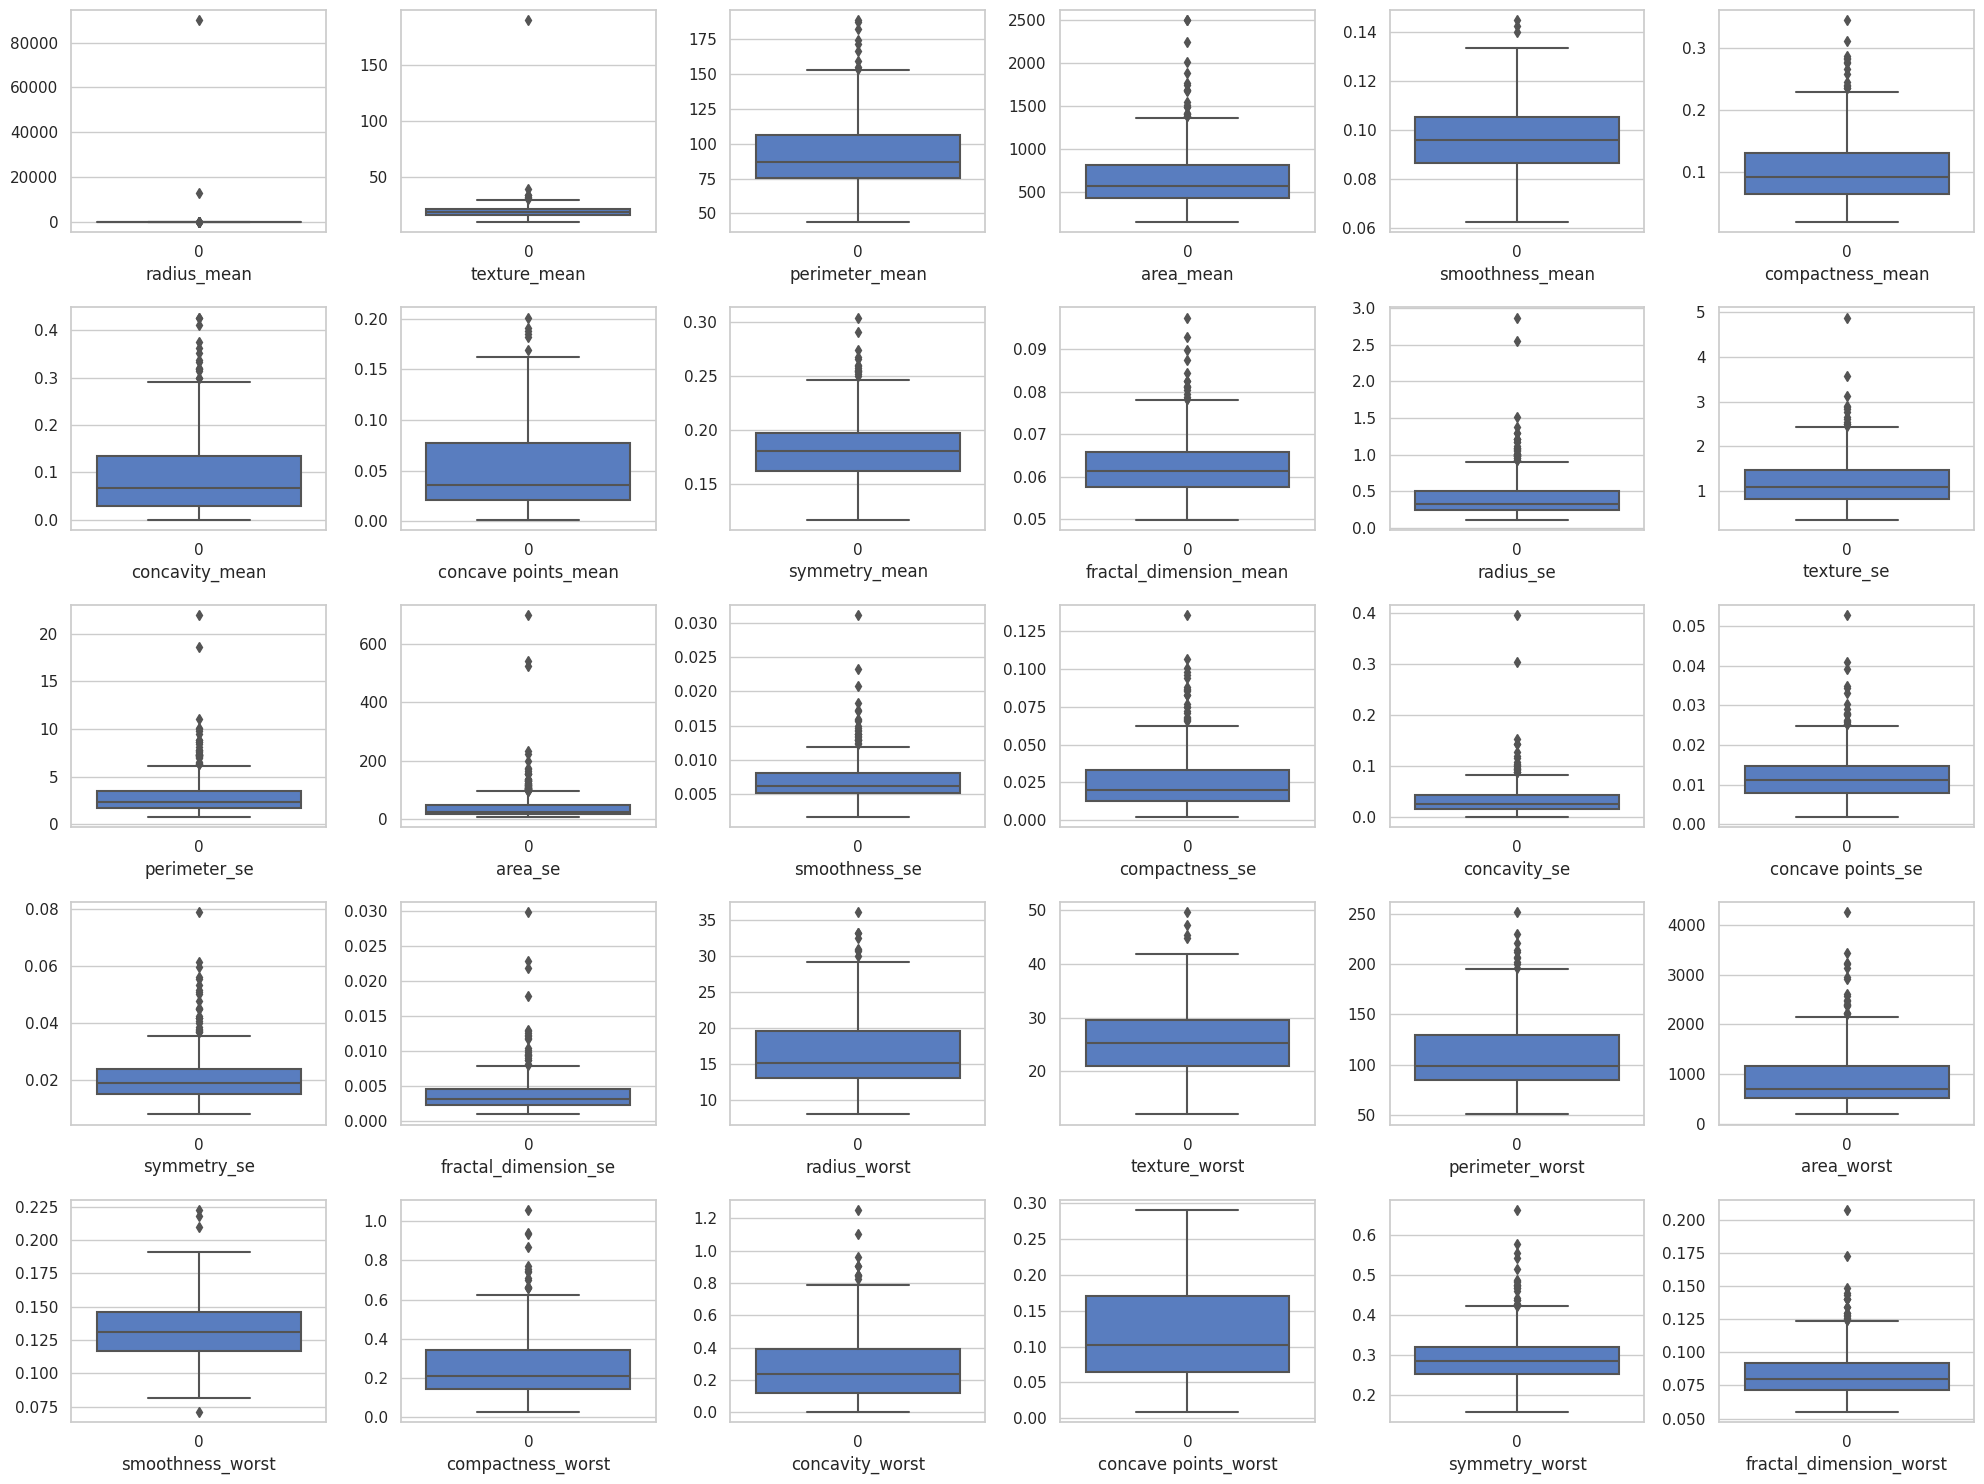

In [ ]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in df.drop(["id", "diagnosis"], axis = 1):
    if plotnumber <= 30:
        ax = plt.subplot(5, 6, plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()

#Handling Outlier

In [ ]:
# handle outlier using interquartile range (IQR) method
def mod_outlier(df):
        df1 = df.copy()
        df = df._get_numeric_data()


        q1 = df.quantile(0.25)
        q3 = df.quantile(0.75)

        iqr = q3 - q1

        lower_bound = q1 -(1.5 * iqr)
        upper_bound = q3 +(1.5 * iqr)


        for col in df.columns:
            for i in range(0,len(df[col])):
                if df.loc[i, col] < lower_bound[col]:
                    df.loc[i, col] = lower_bound[col]

                if df.loc[i, col] > upper_bound[col]:
                    df.loc[i, col] = upper_bound[col]


        for col in df.columns:
            df1[col] = df[col]

        return(df1)

df = mod_outlier(df)

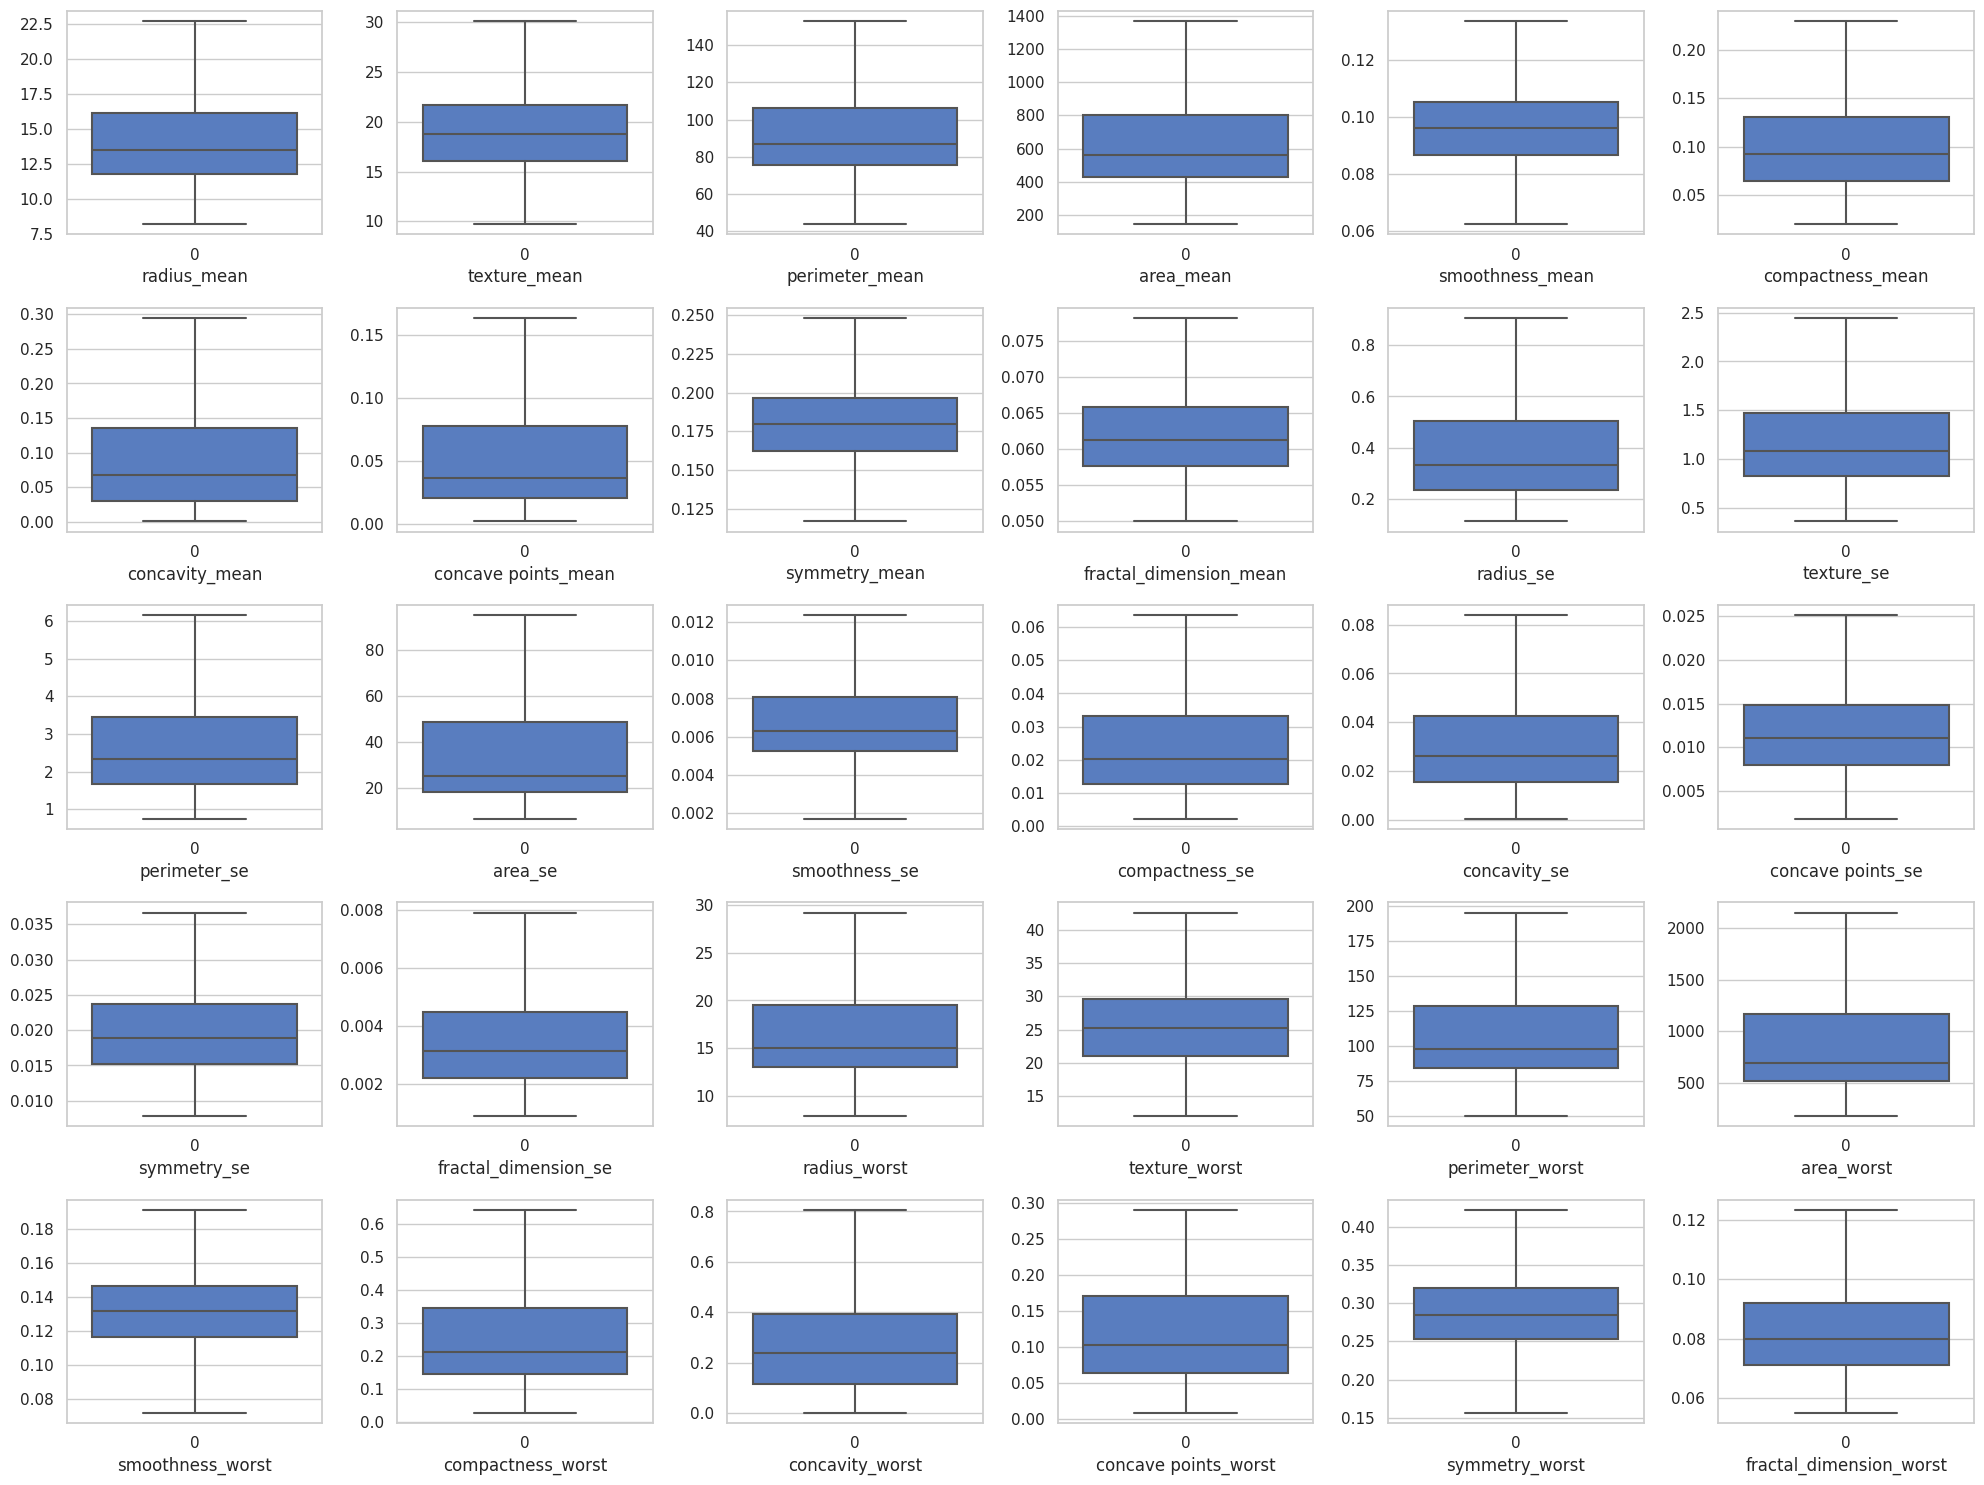

In [ ]:
#Hasil dari handling data diatas terlihat pada box plot di bawah ini yang mana outliernya sudah tidak ada
#dan juga membuat plot histrogram semakin terbaca dengan baik.
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in df.drop(["id", "diagnosis"], axis = 1):
    if plotnumber <= 30:
        ax = plt.subplot(5, 6, plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()

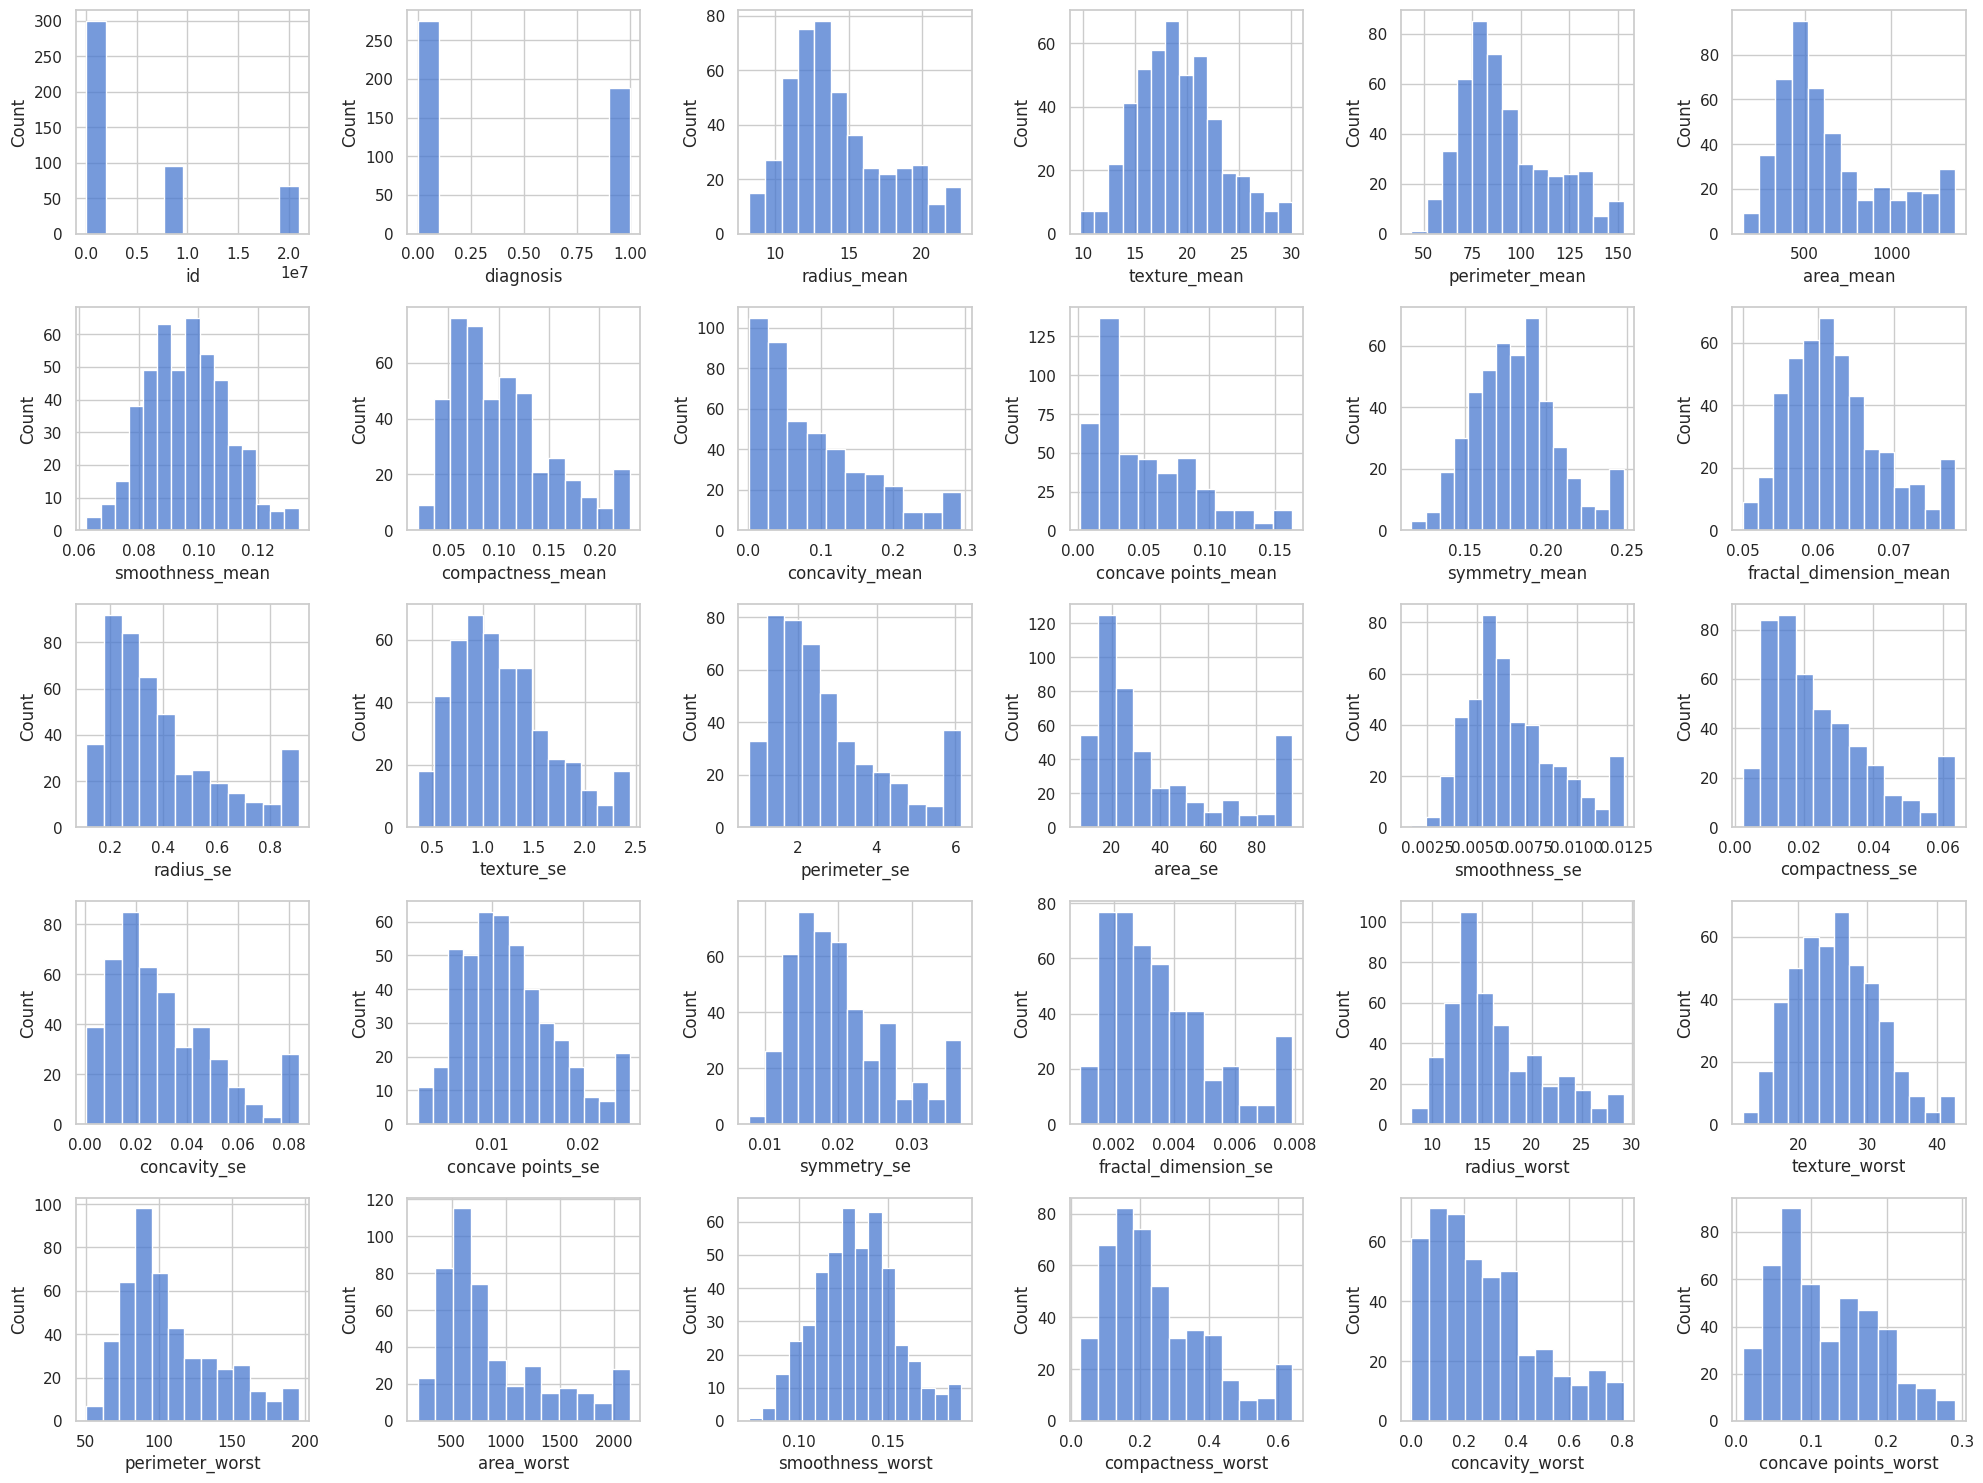

In [ ]:
#Dengan diagram batang
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in df:
    if plotnumber <= 30:
        ax = plt.subplot(5, 6, plotnumber)
        sns.histplot(df[column])
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()

## Correlation between attribute

Pada proses ini akan mencari attribute yang memiliki kemiripan sehingga tidak terlalu berpengaruh secara signifikan pada model TPOT yang akan dibuat, sehingga jika ditemukan attribute yang memiliki korelasi tinggi kita akan drop salah satu diantara attribute tersebut.

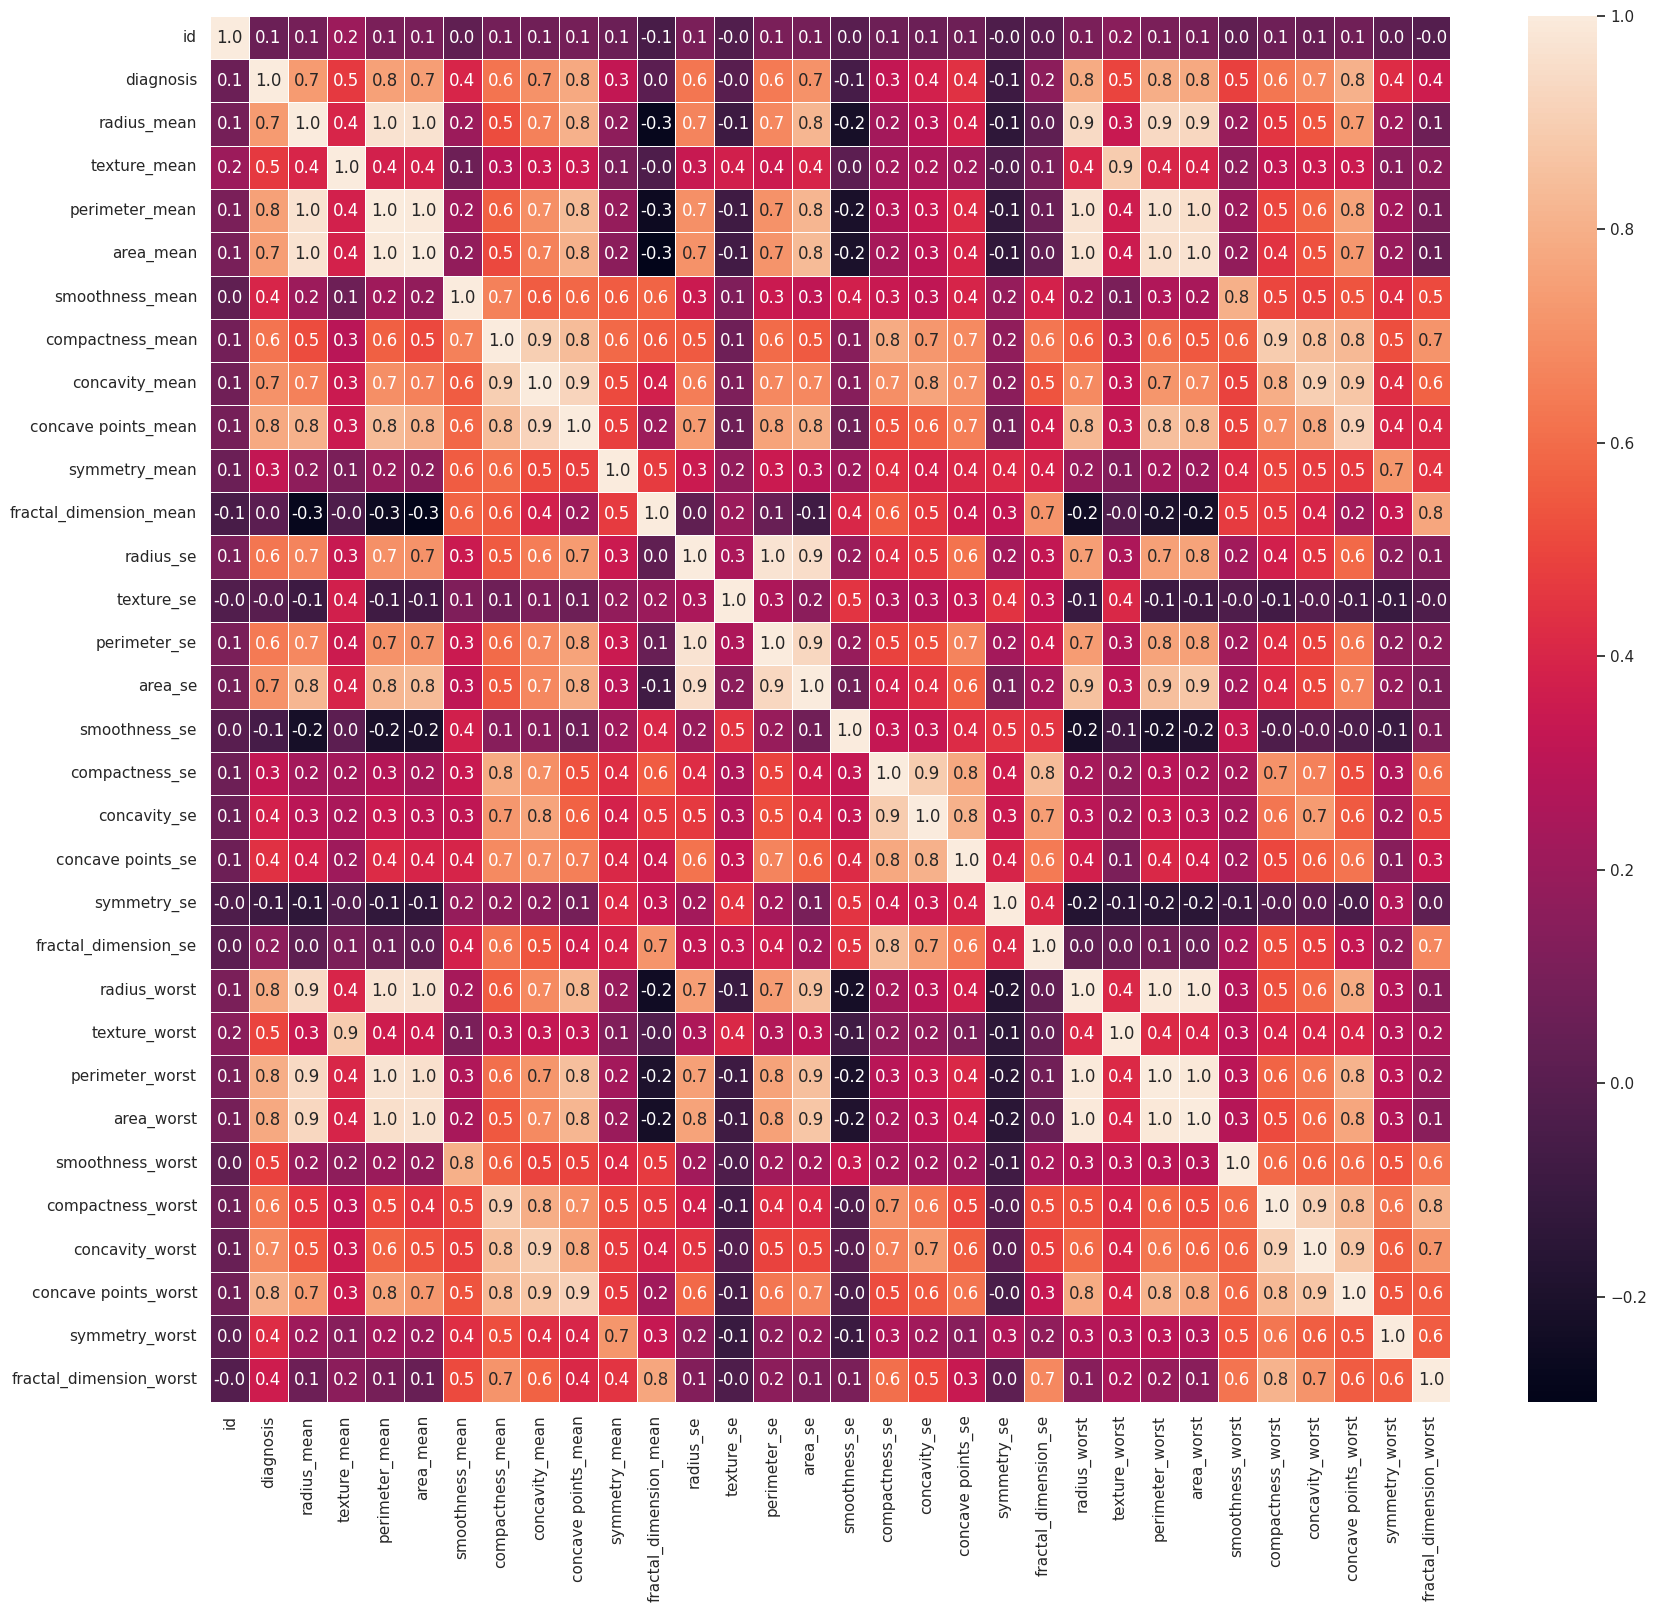

In [ ]:
corr = df.corr()
corr.head()
f,ax = plt.subplots(figsize=(20, 18))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax);

Terlihat dibawah ini terdapat 6 attribute yang memiliki kemiripan sehingga perlu adanya proses drop dan attribute yang akan digunakan dalam modeling TPOT hanya ada 26 column atau attribute dengan detailnya sebagai berikut.

In [ ]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
      if corr.iloc[i,j] >= 0.95:
        if columns[j]:
          columns[j] = False

selected_columns = df.columns[columns]
print("sum of selected column:", selected_columns.shape[0])
print("selected column:", selected_columns)

sum of selected column: 26
selected column: Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'concavity_mean', 'concave points_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se',
       'area_se', 'smoothness_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'symmetry_se', 'fractal_dimension_se',
       'texture_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'concave points_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')


In [ ]:
#melihat ukuran data setelah didrop
df.shape

(463, 32)

mencari attribute yang memiliki korelasi yang sangat tinggi dengan target pada dataset yaitu 'diagnosis' dan terlihat bahwa yang memiliki korelasi tinggi adalah concave points_worst.

In [ ]:
df.corr()['diagnosis'].sort_values(ascending=False).head(10)

diagnosis               1.000000
concave points_worst    0.803169
perimeter_worst         0.795150
radius_worst            0.786654
concave points_mean     0.779188
area_worst              0.777188
perimeter_mean          0.753646
area_mean               0.744366
radius_mean             0.733241
area_se                 0.710097
Name: diagnosis, dtype: float64

**MODEL TPOT**

Spliting data yang akan dilakukan  dengan test_sizenya 20% dari dataset dan random_statenya adalah 42.

In [ ]:
y = df["diagnosis"]
X = df.drop(["id", "diagnosis"], axis = 1)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(370, 30)
(370,)
(93, 30)
(93,)


#Train Model with dataset

Pada train kali ini menggunakan parameter generation 8 , dengan model verbosity dan banyaknya populasi 50

In [ ]:
model = tpot.TPOTClassifier(generations=8, population_size=50, verbosity=2)
model.fit(X_train, y_train)

Imputing missing values in feature set


Optimization Progress:   0%|          | 0/450 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.972972972972973

Generation 2 - Current best internal CV score: 0.972972972972973

Generation 3 - Current best internal CV score: 0.972972972972973

Generation 4 - Current best internal CV score: 0.972972972972973

Generation 5 - Current best internal CV score: 0.9783783783783784

Generation 6 - Current best internal CV score: 0.9810810810810813

Generation 7 - Current best internal CV score: 0.9810810810810813

Generation 8 - Current best internal CV score: 0.9810810810810813

Best pipeline: GradientBoostingClassifier(MLPClassifier(input_matrix, alpha=0.0001, learning_rate_init=0.01), learning_rate=0.5, max_depth=7, max_features=0.9500000000000001, min_samples_leaf=11, min_samples_split=16, n_estimators=100, subsample=0.6000000000000001)


TPOTClassifier(generations=8, population_size=50, verbosity=2)

#EVALUASI RESULT
Pada evaluasi hasil ini kita mencari tahu accuracy dari data test yang telah dilakukan splitting. Terlihat bahwa accuracynya adalah 95.6%.

Kita juga mencari tau terkait best pipeline yang dihasilkan oleh TPOT. Terlihat bahwa best pipeline yang ditemukan TPOT adalah menggunakan model LinearSVC dengan C nya adalah 25 dan MultinomialNB sebagai estimatornya.

In [ ]:
#Menlihat akurasi
print("Accuracy is {}%".format(model.score(X_test, y_test)*100))

Imputing missing values in feature set
Accuracy is 96.7741935483871%


In [ ]:
#Best pipeline
print("Best pipeline:", model.fitted_pipeline_)

Best pipeline: Pipeline(steps=[('stackingestimator',
                 StackingEstimator(estimator=MLPClassifier(learning_rate_init=0.01))),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(learning_rate=0.5, max_depth=7,
                                            max_features=0.9500000000000001,
                                            min_samples_leaf=11,
                                            min_samples_split=16,
                                            subsample=0.6000000000000001))])


#EXPERIMENT

Pada tahap ini akan dilakukan pencarian parameter pipeline search TPOT dengan list value generationsnya adalah 5 atau 10, sedangkan popultion_sizenya 50, 100, atau 150.


Eksperimen ke-1 Mengatur parameter generations=5 , population_size=50, dan verbosity=2

In [ ]:
#pemodelan dengan TPOT
eksperimen1 = tpot.TPOTClassifier(generations=5, population_size=50, verbosity=2)
eksperimen1.fit(X_train, y_train)

Imputing missing values in feature set


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9702702702702704

Generation 2 - Current best internal CV score: 0.972972972972973

Generation 3 - Current best internal CV score: 0.9783783783783784

Generation 4 - Current best internal CV score: 0.9783783783783784

Generation 5 - Current best internal CV score: 0.9783783783783784

Best pipeline: GaussianNB(GradientBoostingClassifier(input_matrix, learning_rate=0.5, max_depth=8, max_features=0.8, min_samples_leaf=14, min_samples_split=13, n_estimators=100, subsample=0.4))


TPOTClassifier(generations=5, population_size=50, verbosity=2)

In [ ]:
#Menlihat akurasi
print("Accuracy is {}%".format(eksperimen1.score(X_test, y_test)*100))

Imputing missing values in feature set
Accuracy is 93.54838709677419%


Eksperimen ke-2 Mengatur parameter generations=5 , population_size=100, dan verbosity=2

In [ ]:
#pemodelan dengan TPOT
eksperimen2 = tpot.TPOTClassifier(generations=5, population_size=100, verbosity=2)
eksperimen2.fit(X_train, y_train)

Imputing missing values in feature set


Optimization Progress:   0%|          | 0/600 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9783783783783784

Generation 2 - Current best internal CV score: 0.9783783783783784

Generation 3 - Current best internal CV score: 0.9783783783783784

Generation 4 - Current best internal CV score: 0.9783783783783784

Generation 5 - Current best internal CV score: 0.9783783783783784

Best pipeline: MLPClassifier(StandardScaler(input_matrix), alpha=0.0001, learning_rate_init=0.001)


TPOTClassifier(generations=5, verbosity=2)

In [ ]:
#Menlihat akurasi
print("Accuracy is {}%".format(eksperimen2.score(X_test, y_test)*100))

Imputing missing values in feature set
Accuracy is 96.7741935483871%


Eksperimen ke-3 Mengatur parameter generations=5 , population_size=150, dan verbosity=2

In [ ]:
#pemodelan dengan TPOT
eksperimen3 = tpot.TPOTClassifier(generations=5, population_size=150, verbosity=2)
eksperimen3.fit(X_train, y_train)

In [ ]:
#Menlihat akurasi
print("Accuracy is {}%".format(eksperimen3.score(X_test, y_test)*100))

Imputing missing values in feature set
Accuracy is 97.84946236559139%


Eksperimen ke-4 Mengatur parameter generations=10 , population_size=50, dan verbosity=2

In [ ]:
eksperimen4 = tpot.TPOTClassifier(generations=10, population_size=50, verbosity=2)
eksperimen4.fit(X_train, y_train)

Imputing missing values in feature set


Optimization Progress:   0%|          | 0/550 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.972972972972973

Generation 2 - Current best internal CV score: 0.9756756756756758

Generation 3 - Current best internal CV score: 0.9756756756756758

Generation 4 - Current best internal CV score: 0.9783783783783784


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/stopit/utils.py", line 145, in wrapper
    result = func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/tpot/decorators.py", line 57, in time_limited_call
    func(*args)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 473, in fit
    trees = Parallel(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 63, in __call__
    return super().__call__(iterable_with_config)
  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 1088, in __call__
    while self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 901, in dispatch_one_batch
    self._dispatch(tasks)
  File "/usr/local/lib/python3.10/dist-packages/jobl


Generation 5 - Current best internal CV score: 0.9810810810810813

Generation 6 - Current best internal CV score: 0.9810810810810813


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/stopit/utils.py", line 145, in wrapper
    result = func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/tpot/decorators.py", line 57, in time_limited_call
    func(*args)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py", line 538, in fit
    n_stages = self._fit_stages(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py", line 615, in _fit_stages
    raw_predictions = self._fit_stage(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py", line 257, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight, check_input=False)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/usr/local/lib/python3.10/di


Generation 7 - Current best internal CV score: 0.9810810810810813

Generation 8 - Current best internal CV score: 0.9810810810810813

Generation 9 - Current best internal CV score: 0.9810810810810813

Generation 10 - Current best internal CV score: 0.9810810810810813

Best pipeline: GradientBoostingClassifier(input_matrix, learning_rate=0.5, max_depth=2, max_features=1.0, min_samples_leaf=17, min_samples_split=16, n_estimators=100, subsample=0.4)


TPOTClassifier(generations=10, population_size=50, verbosity=2)

In [ ]:
#Menlihat akurasi
print("Accuracy is {}%".format(eksperimen4.score(X_test, y_test)*100))

Imputing missing values in feature set
Accuracy is 96.7741935483871%


Eksperimen ke-5 Mengatur parameter generations=5 , population_size=100, dan verbosity=2

In [ ]:
eksperimen5 = tpot.TPOTClassifier(generations=10, population_size=100, verbosity=2)
eksperimen5.fit(X_train, y_train)

Imputing missing values in feature set


Optimization Progress:   0%|          | 0/1100 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9783783783783784

Generation 2 - Current best internal CV score: 0.9783783783783784

Generation 3 - Current best internal CV score: 0.9783783783783784

Generation 4 - Current best internal CV score: 0.981081081081081

Generation 5 - Current best internal CV score: 0.981081081081081

Generation 6 - Current best internal CV score: 0.981081081081081


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/stopit/utils.py", line 145, in wrapper
    result = func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/tpot/decorators.py", line 57, in time_limited_call
    func(*args)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 473, in fit
    trees = Parallel(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 63, in __call__
    return super().__call__(iterable_with_config)
  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 1088, in __call__
    while self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 901, in dispatch_one_batch
    self._dispatch(tasks)
  File "/usr/local/lib/python3.10/dist-packages/jobl


Generation 7 - Current best internal CV score: 0.981081081081081


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/stopit/utils.py", line 145, in wrapper
    result = func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/tpot/decorators.py", line 57, in time_limited_call
    func(*args)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 473, in fit
    trees = Parallel(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 63, in __call__
    return super().__call__(iterable_with_config)
  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 1088, in __call__
    while self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 901, in dispatch_one_batch
    self._dispatch(tasks)
  File "/usr/local/lib/python3.10/dist-packages/jobl


Generation 8 - Current best internal CV score: 0.981081081081081


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/stopit/utils.py", line 145, in wrapper
    result = func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/tpot/decorators.py", line 57, in time_limited_call
    func(*args)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 473, in fit
    trees = Parallel(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 63, in __call__
    return super().__call__(iterable_with_config)
  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 1088, in __call__
    while self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 901, in dispatch_one_batch
    self._dispatch(tasks)
  File "/usr/local/lib/python3.10/dist-packages/jobl


Generation 9 - Current best internal CV score: 0.981081081081081


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/stopit/utils.py", line 145, in wrapper
    result = func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/tpot/decorators.py", line 57, in time_limited_call
    func(*args)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 473, in fit
    trees = Parallel(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 63, in __call__
    return super().__call__(iterable_with_config)
  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 1088, in __call__
    while self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 901, in dispatch_one_batch
    self._dispatch(tasks)
  File "/usr/local/lib/python3.10/dist-packages/jobl


Generation 10 - Current best internal CV score: 0.981081081081081

Best pipeline: SGDClassifier(RobustScaler(MinMaxScaler(input_matrix)), alpha=0.01, eta0=0.01, fit_intercept=True, l1_ratio=0.0, learning_rate=constant, loss=modified_huber, penalty=elasticnet, power_t=0.0)


TPOTClassifier(generations=10, verbosity=2)

In [ ]:
#Menlihat akurasi
print("Accuracy is {}%".format(eksperimen5.score(X_test, y_test)*100))

Imputing missing values in feature set
Accuracy is 96.7741935483871%


# Melakukan Prediksi

### Melakukan prediksi terhadap data test menggunakan model TPOT hasil pemodelan dengan data train sebelumnya.

Import data test

In [ ]:
#import data test
df_test = pd.read_csv('test.csv')
df_test = df_test.drop('id', axis=1)
df_test.info()

Melakukan prediksi terhadap data test, kemudian menyimpan hasilnya pada prediction_result.csv

In [ ]:
#melakukan prediksi
pred = model.predict(df_test)
df_test['diagnosis'] = pred
df_test.to_csv('prediction_result.csv', index=False)

Imputing missing values in feature set


Menampilkan data hasil prediksi

In [ ]:
#menampilkan hasil prediksi
hasil_akhir = pd.read_csv('prediction_result.csv')
hasil_akhir.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,11.600,18.36,73.88,412.7,0.08508,0.05855,0.03367,0.017770,0.1516,0.05859,...,24.02,82.68,495.1,0.1342,0.1808,0.18600,0.08288,0.3210,0.07863,0
1,13.170,18.22,84.28,537.3,0.07466,0.05994,0.04859,0.028700,0.1454,0.05549,...,23.89,95.10,687.6,0.1282,0.1965,0.18760,0.10450,0.2235,0.06925,0
2,13.240,20.13,86.87,542.9,0.08284,0.12230,0.10100,0.028330,0.1601,0.06432,...,25.50,115.00,733.5,0.1201,0.5646,0.65560,0.13570,0.2845,0.12490,0
3,13.140,20.74,85.98,536.9,0.08675,0.10890,0.10850,0.035100,0.1562,0.06020,...,25.46,100.90,689.1,0.1351,0.3549,0.45040,0.11810,0.2563,0.08174,0
4,9.668,18.10,61.06,286.3,0.08311,0.05428,0.01479,0.005769,0.1680,0.06412,...,24.62,71.11,380.2,0.1388,0.1255,0.06409,0.02500,0.3057,0.07875,0
